## Loading data and imports

In [2]:
import os
import csv
import urllib.request
import sklearn
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import warnings
import seaborn as sns

#ML
from sklearn import metrics
from sklearn.model_selection import cross_validate, cross_val_score

#For the plots
%matplotlib inline
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
warnings.filterwarnings('ignore')


In [4]:
song = pd.read_csv('../data/processed/train.csv')

In [5]:
song_test = pd.read_csv('../data/processed/test.csv')

## EDA

###Data descrption

Source - Spotify: "In Spotify's API is something called Valence, that describes the musical positiveness conveyed by a track. Tracks with high valence sound more positive (happy, cheerful, euphoric), while tracks with low valence sound more negative (sad, depressed, angry)."

**From very good article explaining Spotify API What Makes a Song Likeable**?- https://towardsdatascience.com/what-makes-a-song-likeable-dbfdb7abe404 we can read that:

---

Spotify Audio Features
For every track on their platform, Spotify provides data for thirteen Audio Features.The Spotify Web API developer guide defines them as follows:

* **Danceability:** Describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity.

* **Valence**: Describes the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).

* **Energy**: Represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale.

* **Tempo**: The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece, and derives directly from the average beat duration.

* **Loudness**: The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks.

* **Speechiness**: This detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value.
Instrumentalness: Predicts whether a track contains no vocals. “Ooh” and “aah” sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly “vocal”.

* **Liveness**: Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live.

* **Acousticness**: A confidence measure from 0.0 to 1.0 of whether the track is acoustic.

* **Key**: The estimated overall key of the track. Integers map to pitches using standard Pitch Class notation . E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on.

* **Mode**: Indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.

* **Duration**: The duration of the track in milliseconds.

* **Time Signature**: An estimated overall time signature of a track. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure).

Data Provided by Remek Kinas [SOURCE](https://www.kaggle.com/c/song-popularity-prediction/discussion/301616)

---

Resources for EDA:
* [Song Popularity Prediction EDA with Martin Henze (Heads or Tails)](https://www.youtube.com/watch?v=JXF-7rCcR1c)
* [Song Popularity Prediction: EDA with Martin Henze (Part-2)](https://www.youtube.com/watch?v=2aE6SvCVOis&ab_channel=AbhishekThakur)
* [Song Popularity EDA - Live Coding Fun - Martin Notebook](https://www.kaggle.com/headsortails/song-popularity-eda-live-coding-fun)

In [4]:
song.head()

id  song_duration_ms  acousticness  danceability    energy  \
0   0          212990.0      0.642286      0.856520  0.707073   
1   1               NaN      0.054866      0.733289  0.835545   
2   2          193213.0           NaN      0.188387  0.783524   
3   3          249893.0      0.488660      0.585234  0.552685   
4   4          165969.0      0.493017           NaN  0.740982   

   instrumentalness   key  liveness  loudness  audio_mode  speechiness  \
0          0.002001  10.0       NaN -5.619088           0     0.082570   
1          0.000996   8.0  0.436428 -5.236965           1     0.127358   
2         -0.002694   5.0  0.170499 -4.951759           0     0.052282   
3          0.000608   0.0  0.094805 -7.893694           0     0.035618   
4          0.002033  10.0  0.094891 -2.684095           0     0.050746   

        tempo  time_signature  audio_valence  song_popularity  
0  158.386236               4       0.734642                0  
1  102.752988               3       0.711531                1  
2  178.685791               3       0.425536                0  
3  128.715630               3       0.453597                0  
4  121.928157               4       0.741311                0

In [5]:
song.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                40000 non-null  int64  
 1   song_duration_ms  35899 non-null  float64
 2   acousticness      36008 non-null  float64
 3   danceability      35974 non-null  float64
 4   energy            36025 non-null  float64
 5   instrumentalness  36015 non-null  float64
 6   key               35935 non-null  float64
 7   liveness          35914 non-null  float64
 8   loudness          36043 non-null  float64
 9   audio_mode        40000 non-null  int64  
 10  speechiness       40000 non-null  float64
 11  tempo             40000 non-null  float64
 12  time_signature    40000 non-null  int64  
 13  audio_valence     40000 non-null  float64
 14  song_popularity   40000 non-null  int64  
dtypes: float64(11), int64(4)
memory usage: 4.6 MB


In [6]:
song.describe()

id  song_duration_ms  acousticness  danceability  \
count  40000.00000      35899.000000  36008.000000  35974.000000   
mean   19999.50000     193165.847572      0.276404      0.570951   
std    11547.14972      45822.127679      0.297928      0.190010   
min        0.00000      25658.000000     -0.013551      0.043961   
25%     9999.75000     166254.500000      0.039618      0.424760   
50%    19999.50000     186660.000000      0.140532      0.608234   
75%    29999.25000     215116.000000      0.482499      0.718464   
max    39999.00000     491671.000000      1.065284      0.957131   

             energy  instrumentalness           key      liveness  \
count  36025.000000      36015.000000  35935.000000  35914.000000   
mean       0.683932          0.036527      5.042605      0.198514   
std        0.212662          0.150024      3.372728      0.151670   
min       -0.001682         -0.004398      0.000000      0.027843   
25%        0.539276          0.000941      2.000000      0.111796   
50%        0.704453          0.001974      5.000000      0.135945   
75%        0.870503          0.003225      8.000000      0.212842   
max        1.039741          1.075415     11.000000      1.065298   

           loudness    audio_mode   speechiness         tempo  time_signature  \
count  36043.000000  40000.000000  40000.000000  40000.000000    40000.000000   
mean      -7.407596      0.321150      0.094107    116.562815        3.394375   
std        3.877198      0.466924      0.083591     26.167911        0.524405   
min      -32.117911      0.000000      0.015065     62.055779        2.000000   
25%       -9.578139      0.000000      0.038500     96.995309        3.000000   
50%       -6.345413      0.000000      0.055881    113.795959        3.000000   
75%       -4.620711      1.000000      0.118842    128.517383        4.000000   
max       -0.877346      1.000000      0.560748    219.163578        5.000000   

       audio_valence  song_popularity  
count   40000.000000     40000.000000  
mean        0.580645         0.364400  
std         0.237351         0.481268  
min         0.013398         0.000000  
25%         0.398669         0.000000  
50%         0.598827         0.000000  
75%         0.759635         1.000000  
max         1.022558         1.000000

### Missing values

Number of nans values in the data are pretty much the same. Percentage of the missing data is around 10% per feature with missing values. 

---
**Replacing or dropping then?**

Replace with median
* acoustiness, loudness, liveness, song_duration_ms, danceability, energy

Replace with mode/median
* instrumentalness, key, 

In [7]:
nans = song.isnull().sum().sort_values(ascending=False)

In [8]:
nans = nans[nans > 0]

In [9]:
print(nans)

song_duration_ms    4101
liveness            4086
key                 4065
danceability        4026
acousticness        3992
instrumentalness    3985
energy              3975
loudness            3957
dtype: int64


<AxesSubplot:>

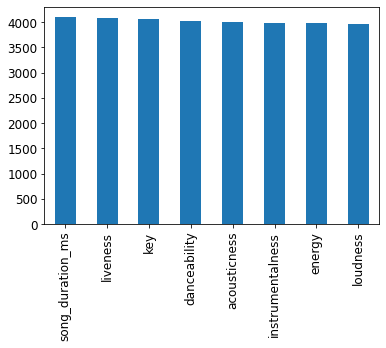

In [10]:
nans.plot(kind='bar')

In [11]:
percent_nans = round((nans/40000), ndigits=4)

In [12]:
nans_table = pd.concat([nans, percent_nans], axis=1, keys=['Total', 'Percentage'])
nans_table

Total  Percentage
song_duration_ms   4101      0.1025
liveness           4086      0.1022
key                4065      0.1016
danceability       4026      0.1006
acousticness       3992      0.0998
instrumentalness   3985      0.0996
energy             3975      0.0994
loudness           3957      0.0989

### Data visualization

In [13]:
song_copy = song.copy() #Creating copy of the data

In [14]:
song_copy = song_copy.drop(['id', 'song_popularity'], axis=1) #Dropping id and target columns

array([[<AxesSubplot:title={'center':'song_duration_ms'}>,
        <AxesSubplot:title={'center':'acousticness'}>,
        <AxesSubplot:title={'center':'danceability'}>,
        <AxesSubplot:title={'center':'energy'}>],
       [<AxesSubplot:title={'center':'instrumentalness'}>,
        <AxesSubplot:title={'center':'key'}>,
        <AxesSubplot:title={'center':'liveness'}>,
        <AxesSubplot:title={'center':'loudness'}>],
       [<AxesSubplot:title={'center':'audio_mode'}>,
        <AxesSubplot:title={'center':'speechiness'}>,
        <AxesSubplot:title={'center':'tempo'}>,
        <AxesSubplot:title={'center':'time_signature'}>],
       [<AxesSubplot:title={'center':'audio_valence'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

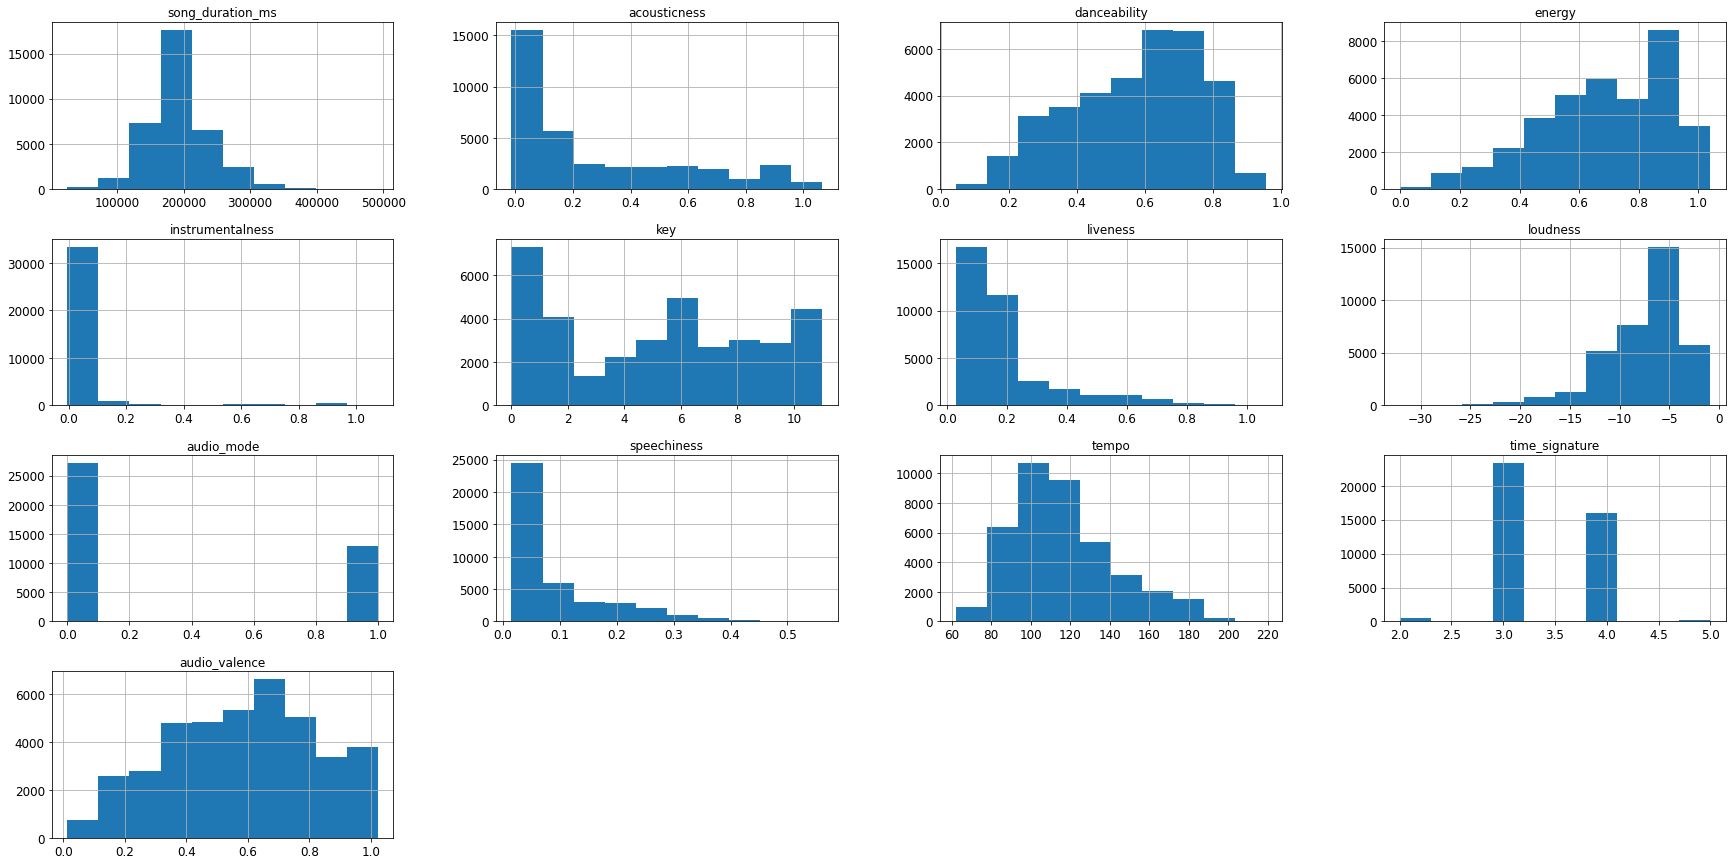

In [15]:
song_copy.hist(figsize=(30,15)) #Plotting histograms to the check distribution

Things to take into consideration:
* different scales
* missing values
* log transformations needed for skewed

Candidates for transformations: spechiness, tempo, loudness, acoustiness, liveness, energry, danceability?

Normal ditibuted: song_duration



#### Discrete variables plots

In [16]:
#Checking out unique values in discrete variables
num_categorical = ['audio_mode', 'time_signature', 'key']
for i in num_categorical:
  print(i, song[i].unique())

audio_mode [0 1]
time_signature [4 3 2 5]
key [10.  8.  5.  0.  4.  3. nan  6.  2.  7.  1.  9. 11.]


<AxesSubplot:xlabel='key', ylabel='count'>

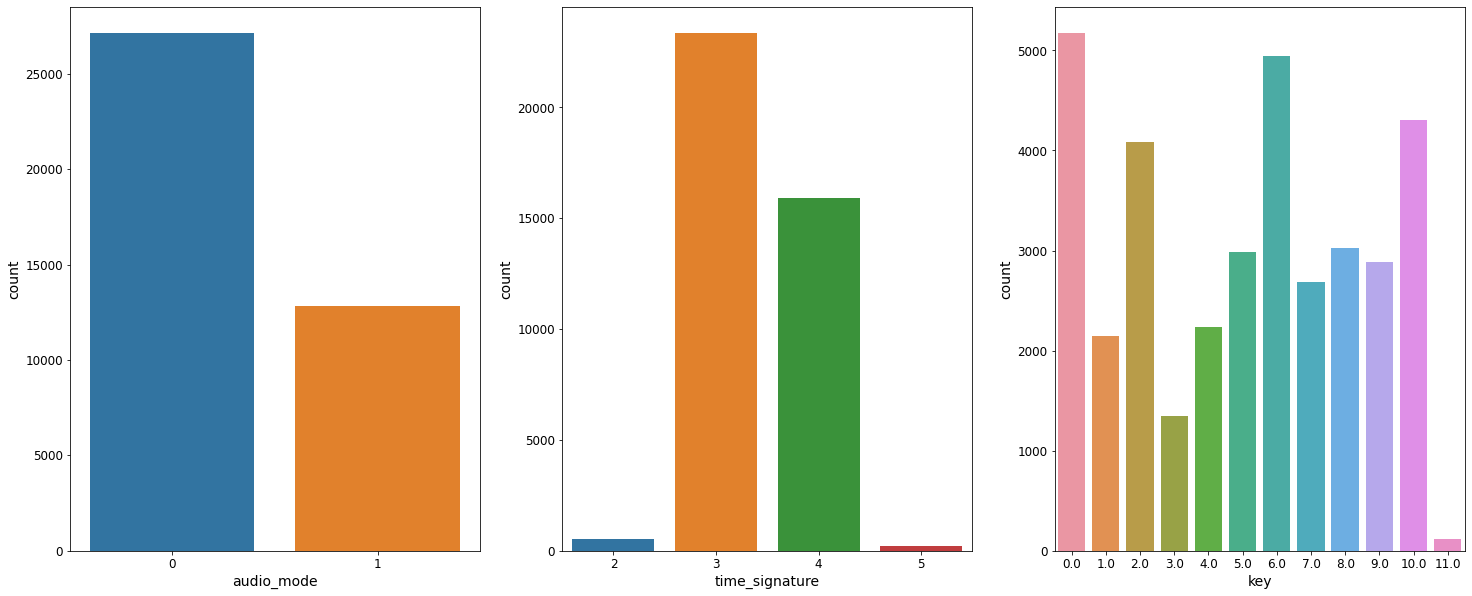

In [17]:
#Plotting discrete variables
fig, ax = plt.subplots(1,3, figsize=(25, 10))
sns.countplot(song['audio_mode'], ax=ax[0])
sns.countplot(song['time_signature'], ax=ax[1])
sns.countplot(song['key'], ax=ax[2])



### Continous variable plots

In [18]:
cont_cols = ['song_duration_ms',	'acousticness',	'danceability',	'energy',	'instrumentalness',	'liveness',	'loudness',	'speechiness',	'tempo', 'audio_valence']

In [19]:
#Converting df from wide to long-form
data = pd.melt(song, value_vars=cont_cols)

In [20]:
data.head()

variable     value
0  song_duration_ms  212990.0
1  song_duration_ms       NaN
2  song_duration_ms  193213.0
3  song_duration_ms  249893.0
4  song_duration_ms  165969.0

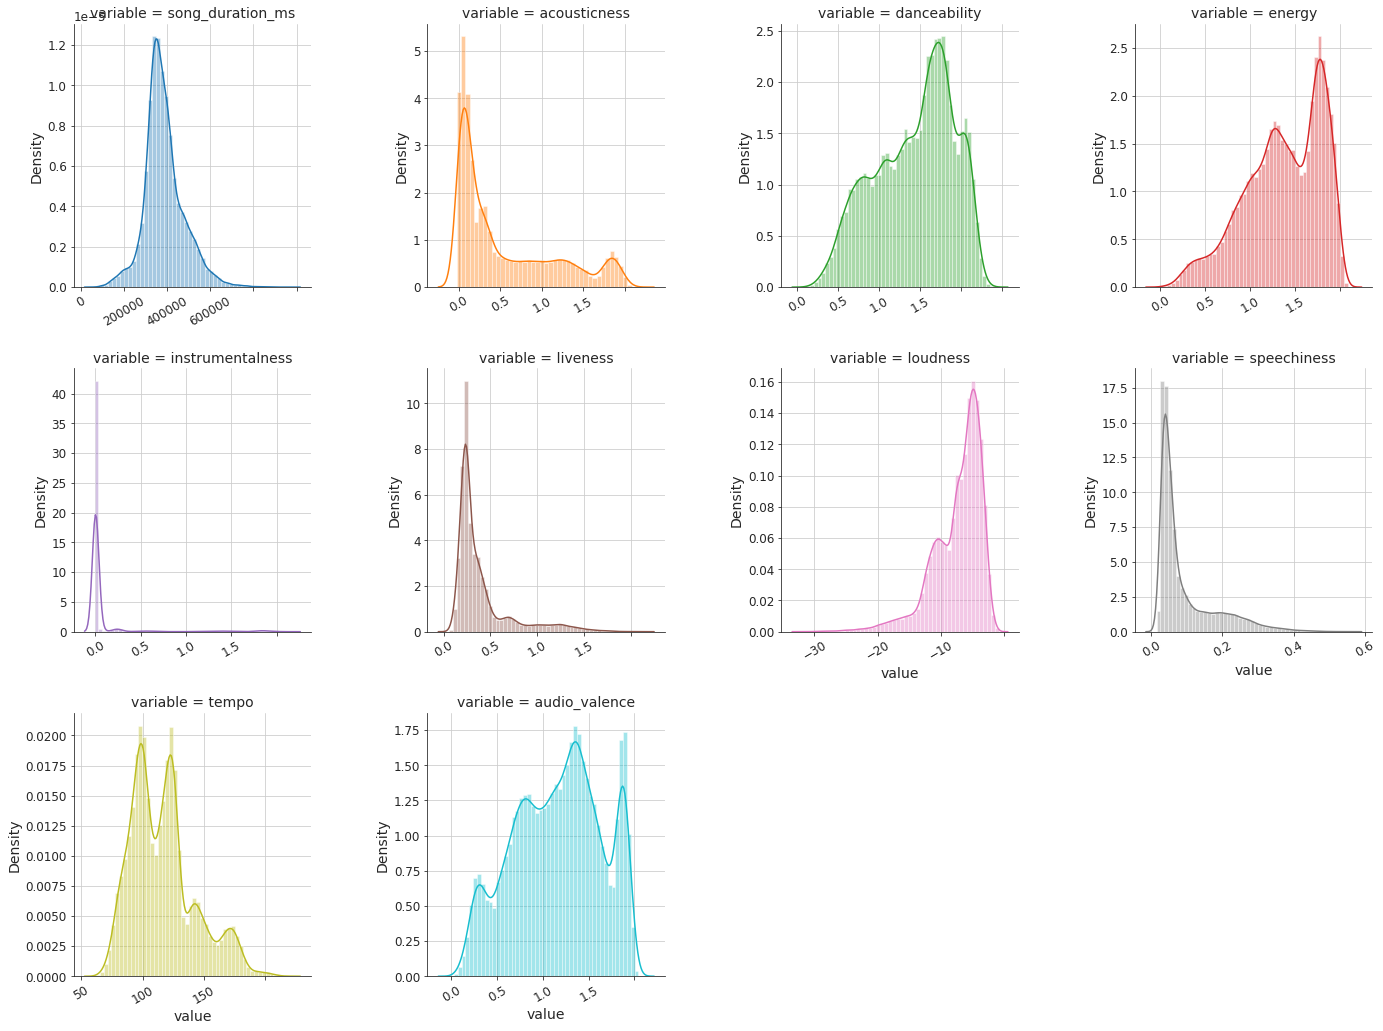

In [21]:
#Using col_wrap - we have one row. Plotting all continous numerical cols
sns.set_style('ticks', {'axes.grid': True})
plots = sns.FacetGrid(data, col='variable', col_wrap=4, sharex=False, sharey=False, hue='variable')
plots = plots.map(sns.distplot,'value')
for axes in plots.axes.flat:
  _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=30)
plt.gcf().set_size_inches(20,15)



Don't mind the x-tick labels in the range 0-1.5. For variables with data in this range, the x-tick labels should be 0-1.0 (like in the histograms plots).  

#### Target variable plot

It seems that we'are dealing with imbalanced, maybe some balancing should be in order. 

<AxesSubplot:xlabel='song_popularity', ylabel='count'>

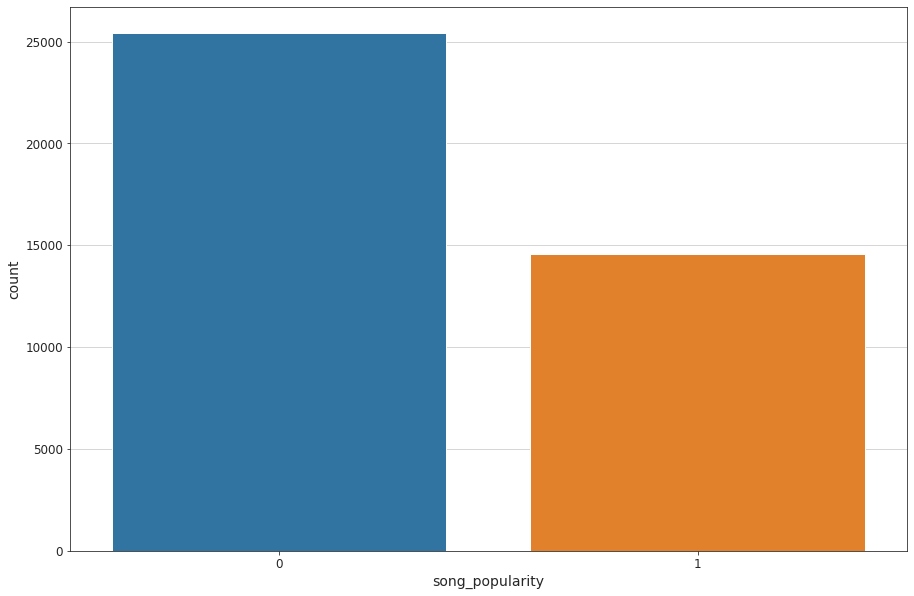

In [22]:
fig, ax = plt.subplots(figsize=(15,10))
sns.countplot(data=song, x='song_popularity')

### Correlations

In [23]:
corr_matrix = song.corr()

In [24]:
corr_matrix

id  song_duration_ms  acousticness  danceability  \
id                1.000000         -0.004428     -0.002733     -0.003237   
song_duration_ms -0.004428          1.000000     -0.166443     -0.061929   
acousticness     -0.002733         -0.166443      1.000000     -0.093737   
danceability     -0.003237         -0.061929     -0.093737      1.000000   
energy            0.000051          0.148531     -0.570177      0.099933   
instrumentalness  0.001087         -0.024337      0.072516     -0.146447   
key              -0.001492          0.019354     -0.186663      0.120514   
liveness         -0.004756          0.033009     -0.124704      0.045400   
loudness          0.005135          0.152954     -0.532724      0.200148   
audio_mode        0.002538         -0.017211      0.066973      0.030289   
speechiness       0.002792         -0.001236     -0.130244      0.177937   
tempo            -0.001297          0.085490     -0.190964     -0.089887   
time_signature   -0.002199          0.021609     -0.205307      0.016455   
audio_valence    -0.001016         -0.006948     -0.250310      0.384496   
song_popularity  -0.003074         -0.003960      0.025298      0.017572   

                    energy  instrumentalness       key  liveness  loudness  \
id                0.000051          0.001087 -0.001492 -0.004756  0.005135   
song_duration_ms  0.148531         -0.024337  0.019354  0.033009  0.152954   
acousticness     -0.570177          0.072516 -0.186663 -0.124704 -0.532724   
danceability      0.099933         -0.146447  0.120514  0.045400  0.200148   
energy            1.000000         -0.120338  0.210176  0.154907  0.643931   
instrumentalness -0.120338          1.000000 -0.054726 -0.033445 -0.181889   
key               0.210176         -0.054726  1.000000  0.077046  0.201509   
liveness          0.154907         -0.033445  0.077046  1.000000  0.146551   
loudness          0.643931         -0.181889  0.201509  0.146551  1.000000   
audio_mode       -0.094916         -0.003617 -0.036252 -0.013281 -0.076893   
speechiness       0.120053         -0.053209  0.102993  0.076612  0.157550   
tempo             0.225465         -0.010350  0.053206  0.064425  0.173979   
time_signature    0.238722         -0.047397  0.094144  0.037766  0.245403   
audio_valence     0.324626         -0.157760  0.132194  0.084770  0.356330   
song_popularity  -0.054640         -0.009511  0.017808  0.016571 -0.040662   

                  audio_mode  speechiness     tempo  time_signature  \
id                  0.002538     0.002792 -0.001297       -0.002199   
song_duration_ms   -0.017211    -0.001236  0.085490        0.021609   
acousticness        0.066973    -0.130244 -0.190964       -0.205307   
danceability        0.030289     0.177937 -0.089887        0.016455   
energy             -0.094916     0.120053  0.225465        0.238722   
instrumentalness   -0.003617    -0.053209 -0.010350       -0.047397   
key                -0.036252     0.102993  0.053206        0.094144   
liveness           -0.013281     0.076612  0.064425        0.037766   
loudness           -0.076893     0.157550  0.173979        0.245403   
audio_mode          1.000000     0.019790 -0.023202       -0.043714   
speechiness         0.019790     1.000000  0.036192        0.035013   
tempo              -0.023202     0.036192  1.000000        0.084836   
time_signature     -0.043714     0.035013  0.084836        1.000000   
audio_valence      -0.015683     0.112558  0.025843        0.164075   
song_popularity    -0.001455     0.024230 -0.011800       -0.014701   

                  audio_valence  song_popularity  
id                    -0.001016        -0.003074  
song_duration_ms      -0.006948        -0.003960  
acousticness          -0.250310         0.025298  
danceability           0.384496         0.017572  
energy                 0.324626        -0.054640  
instrumentalness      -0.157760        -0.009511  
key                    0.132194         0.017808  
liveness     

<AxesSubplot:>

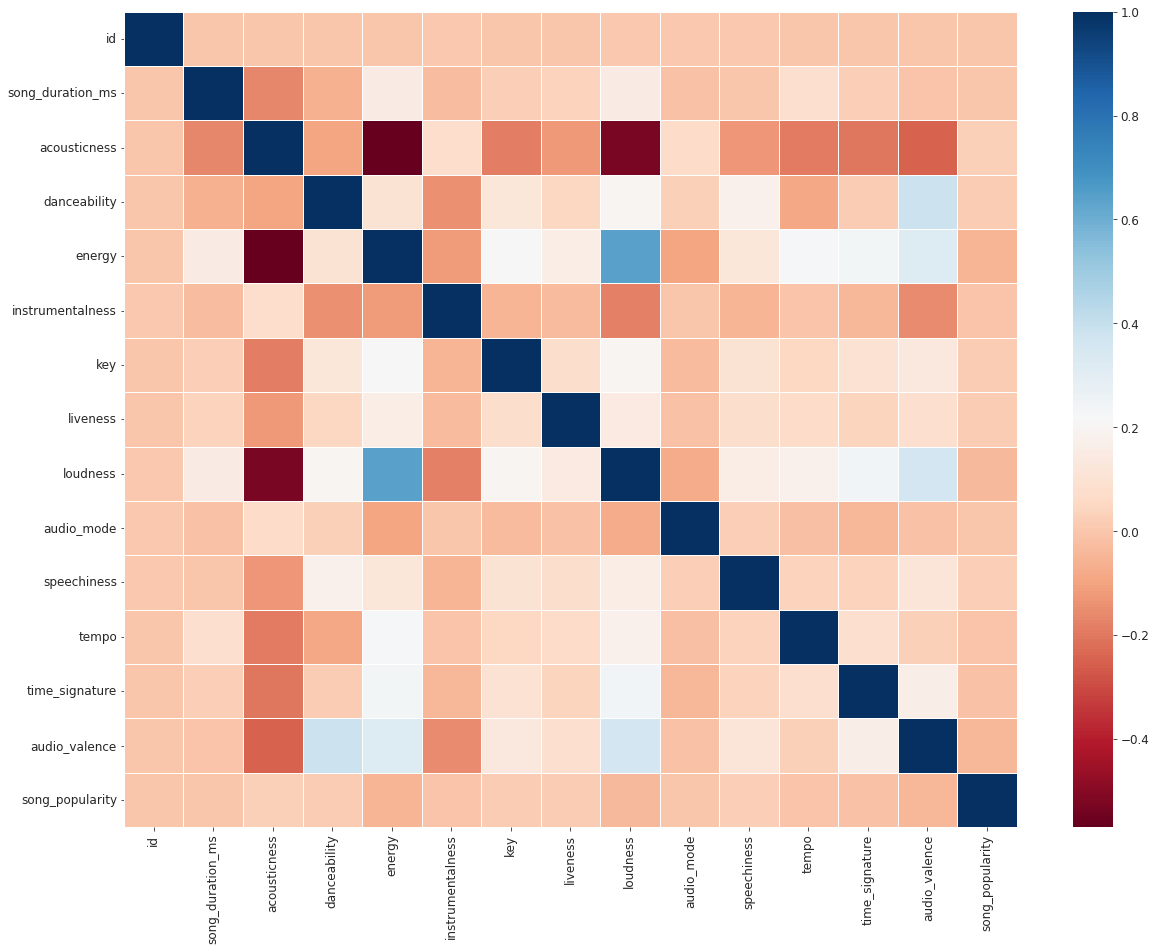

In [25]:
fig, ax = plt.subplots(figsize=(20, 15))
sns.heatmap(corr_matrix, cmap='RdBu', linewidth=1)

## Feature interactions

### Contionus variables

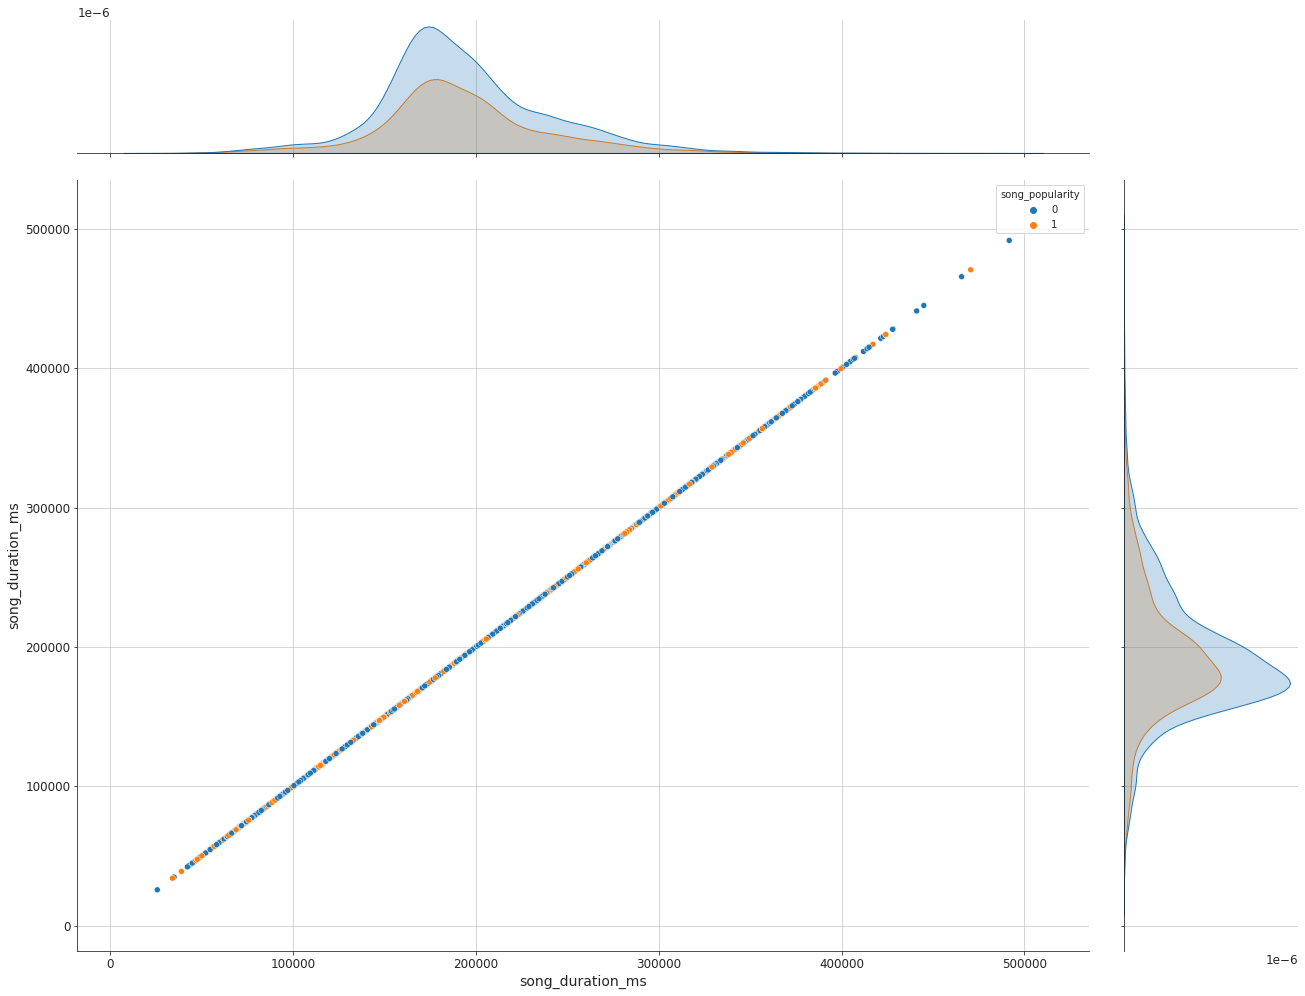

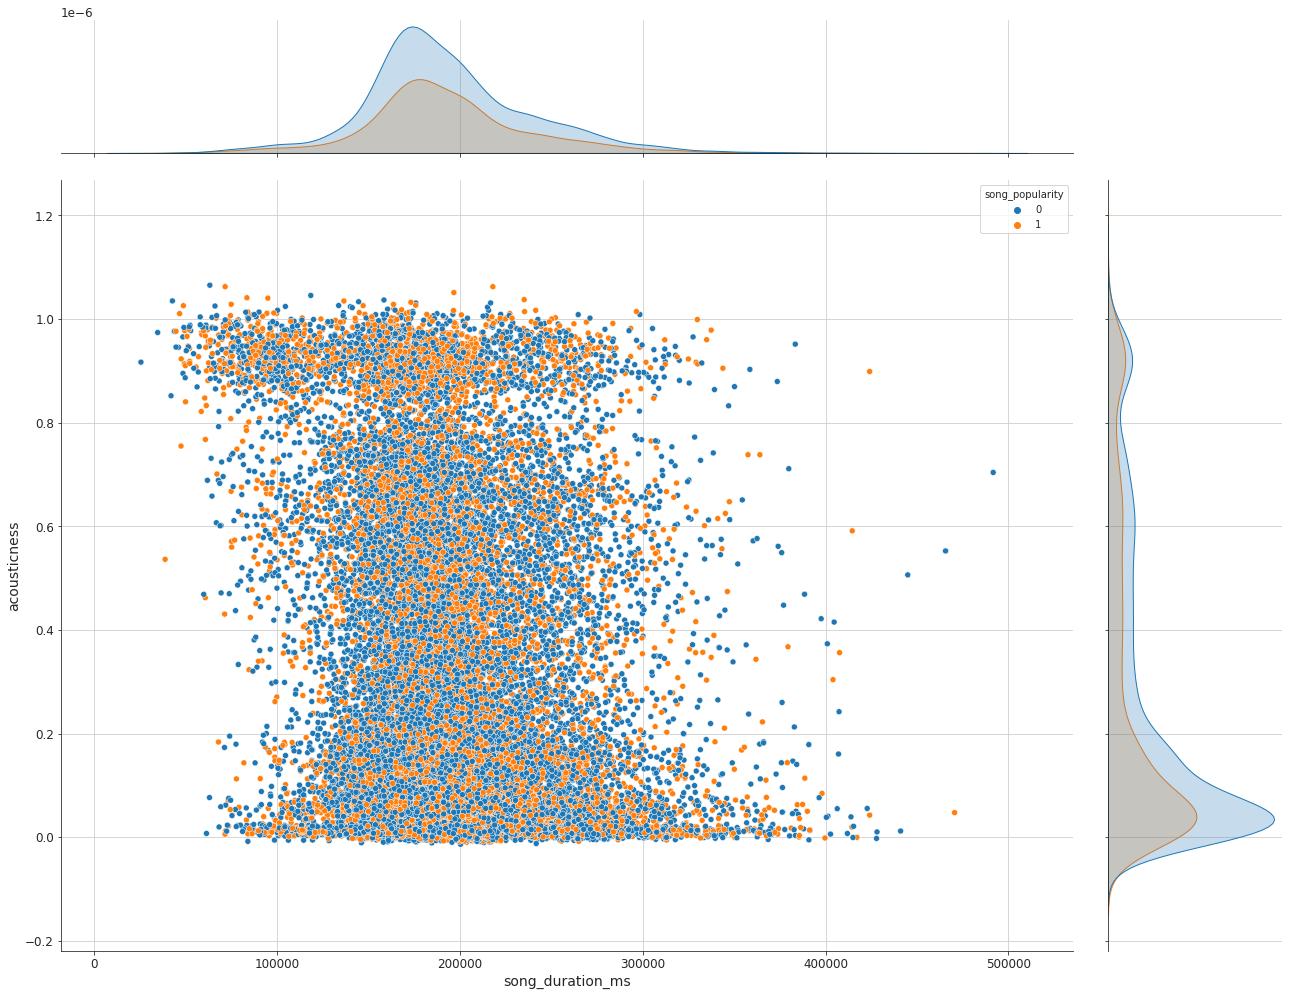

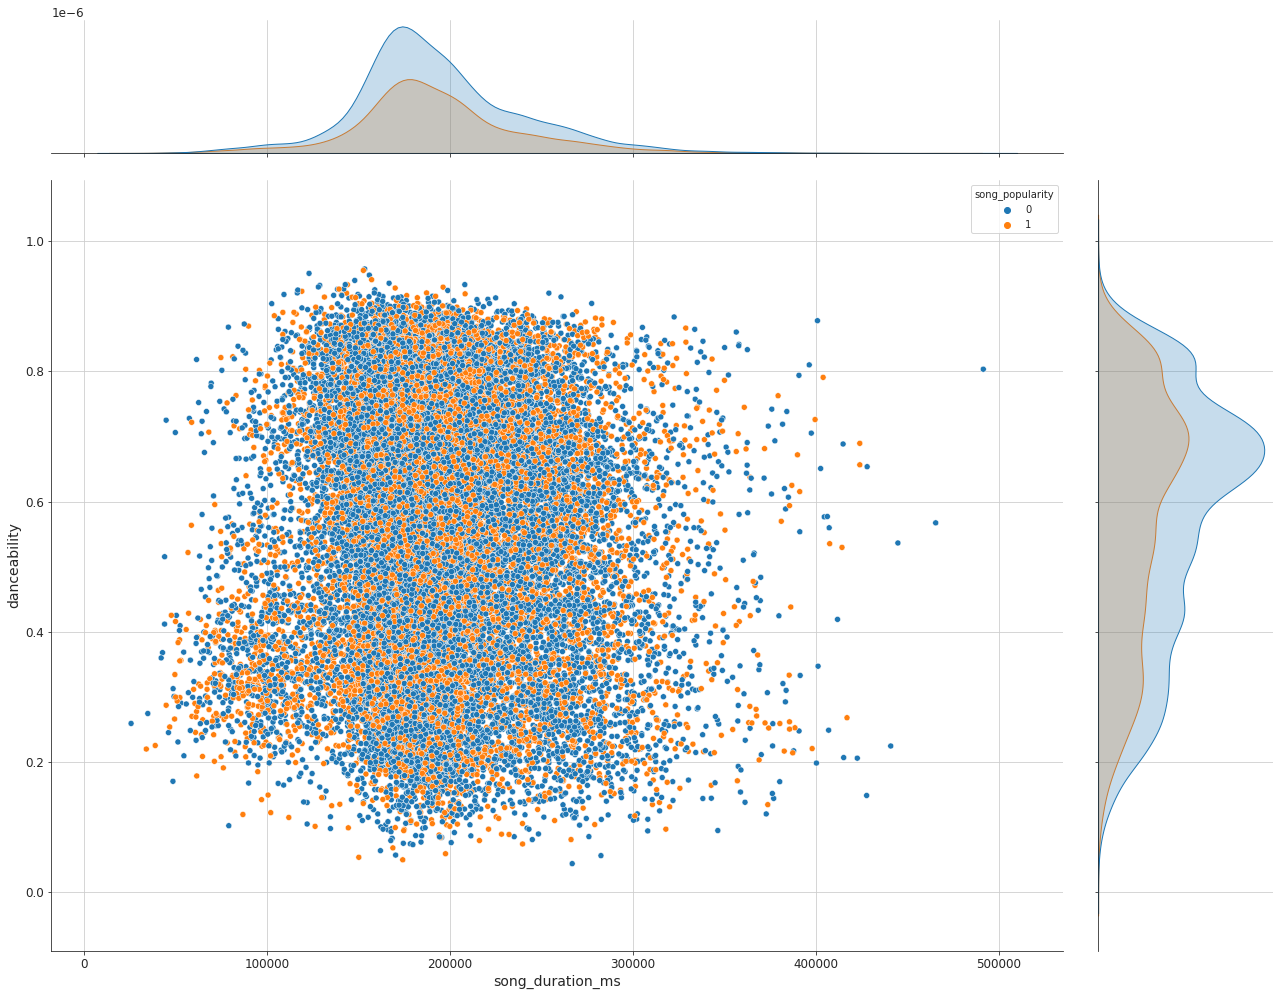

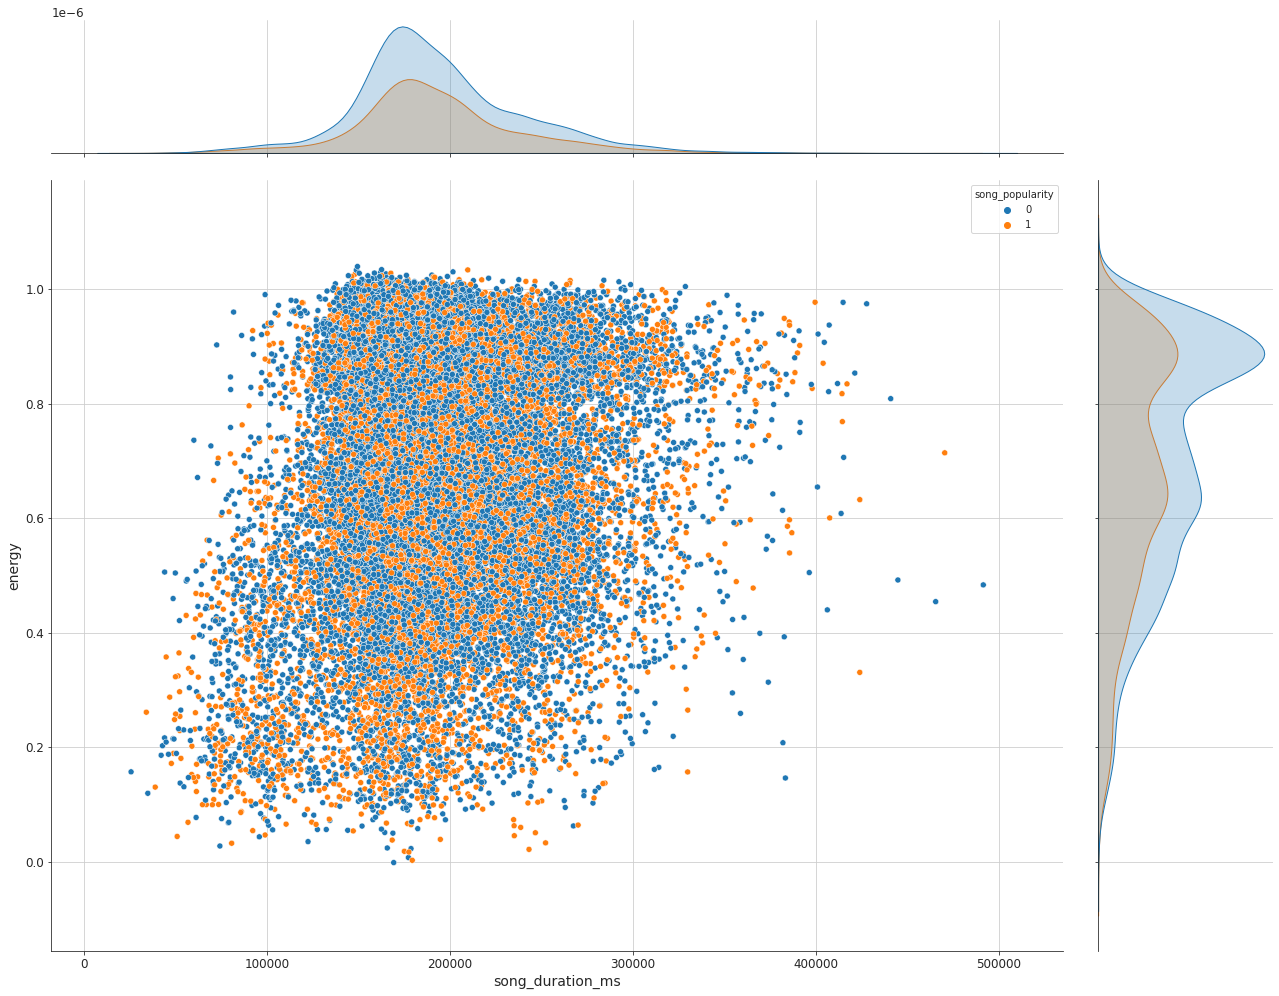

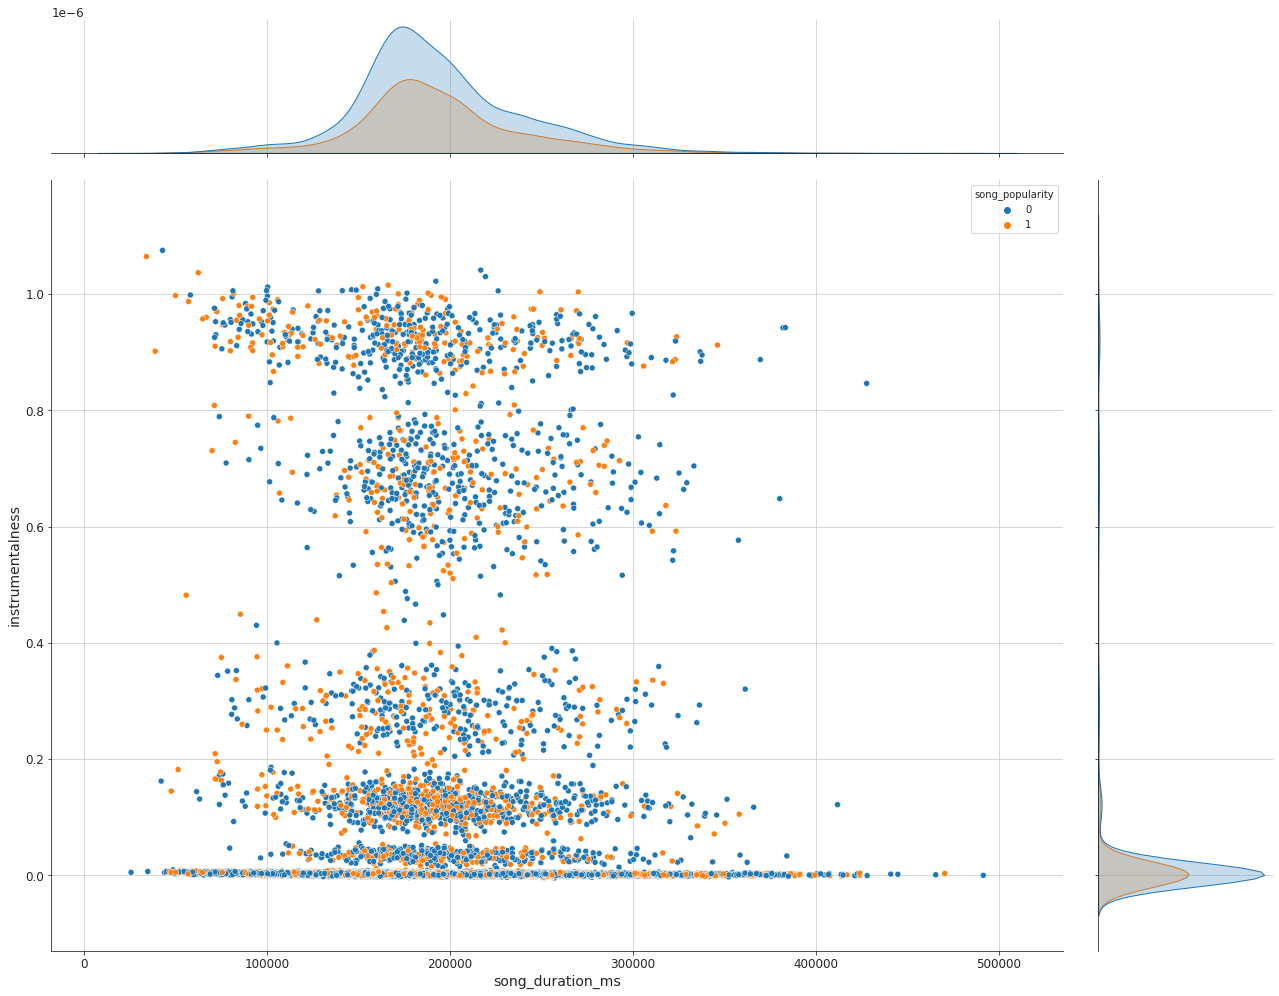

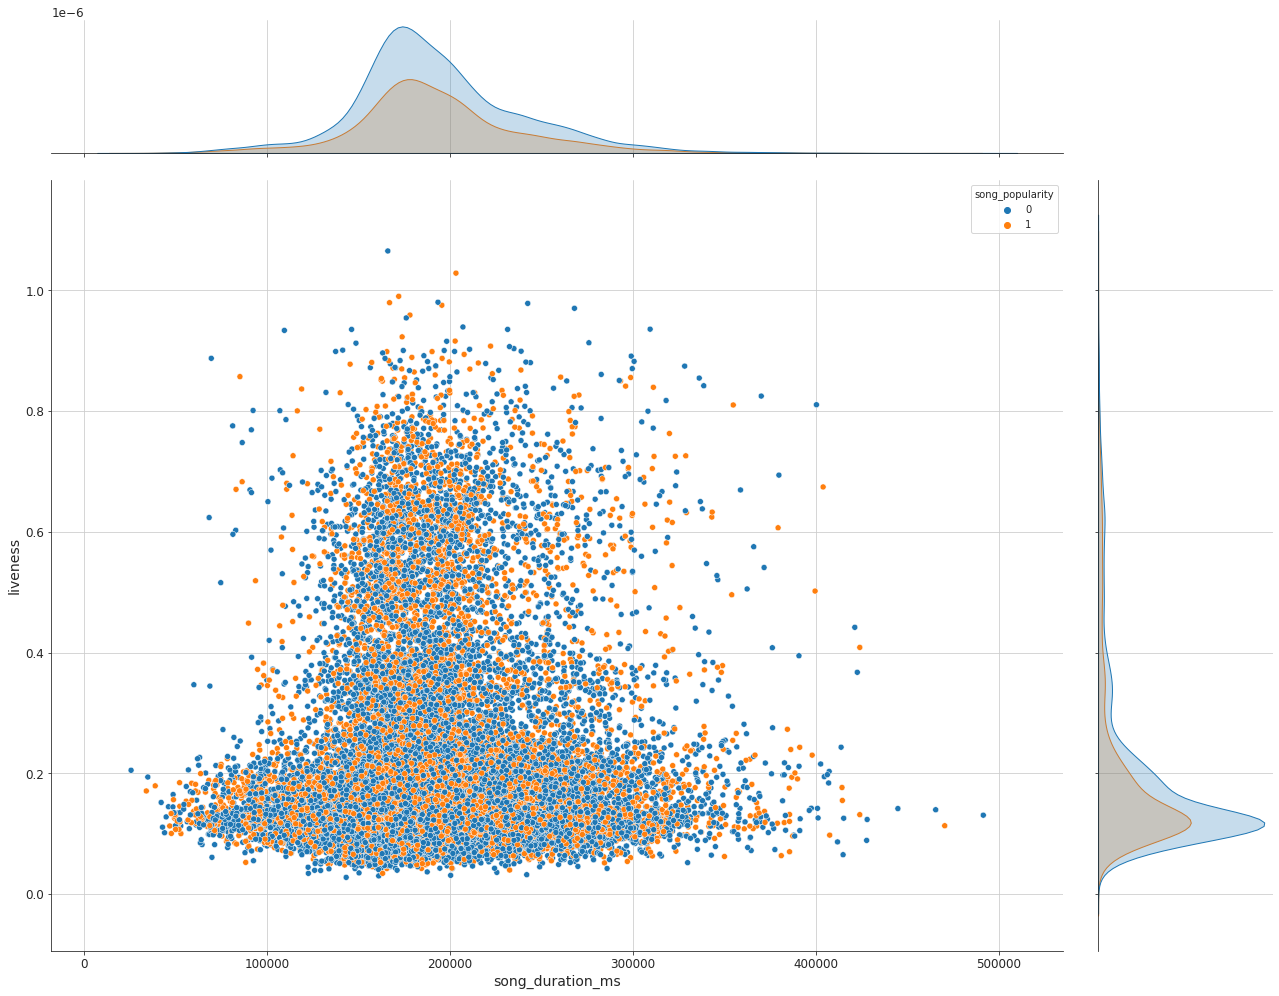

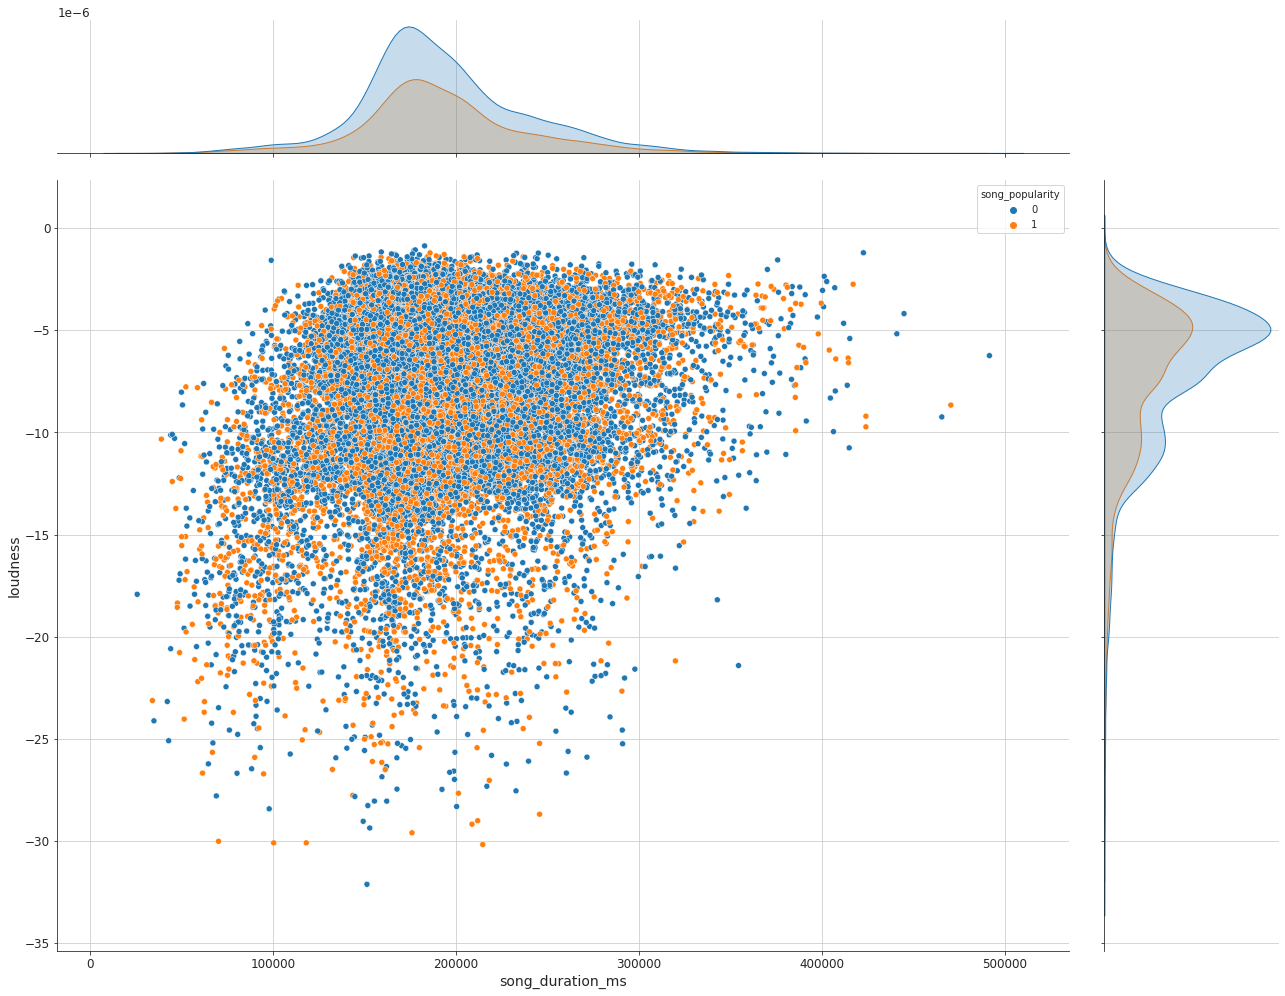

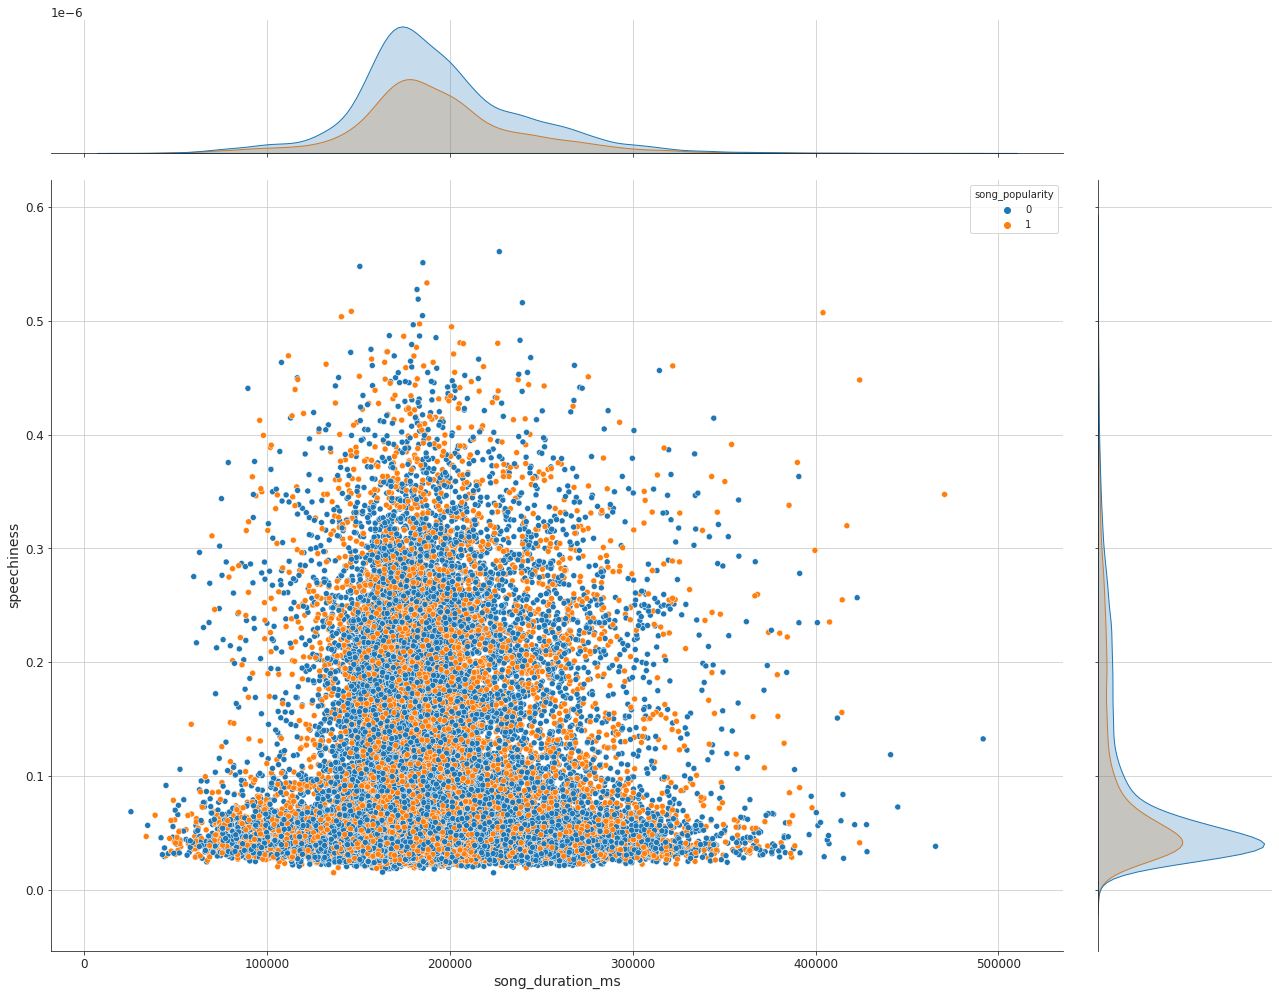

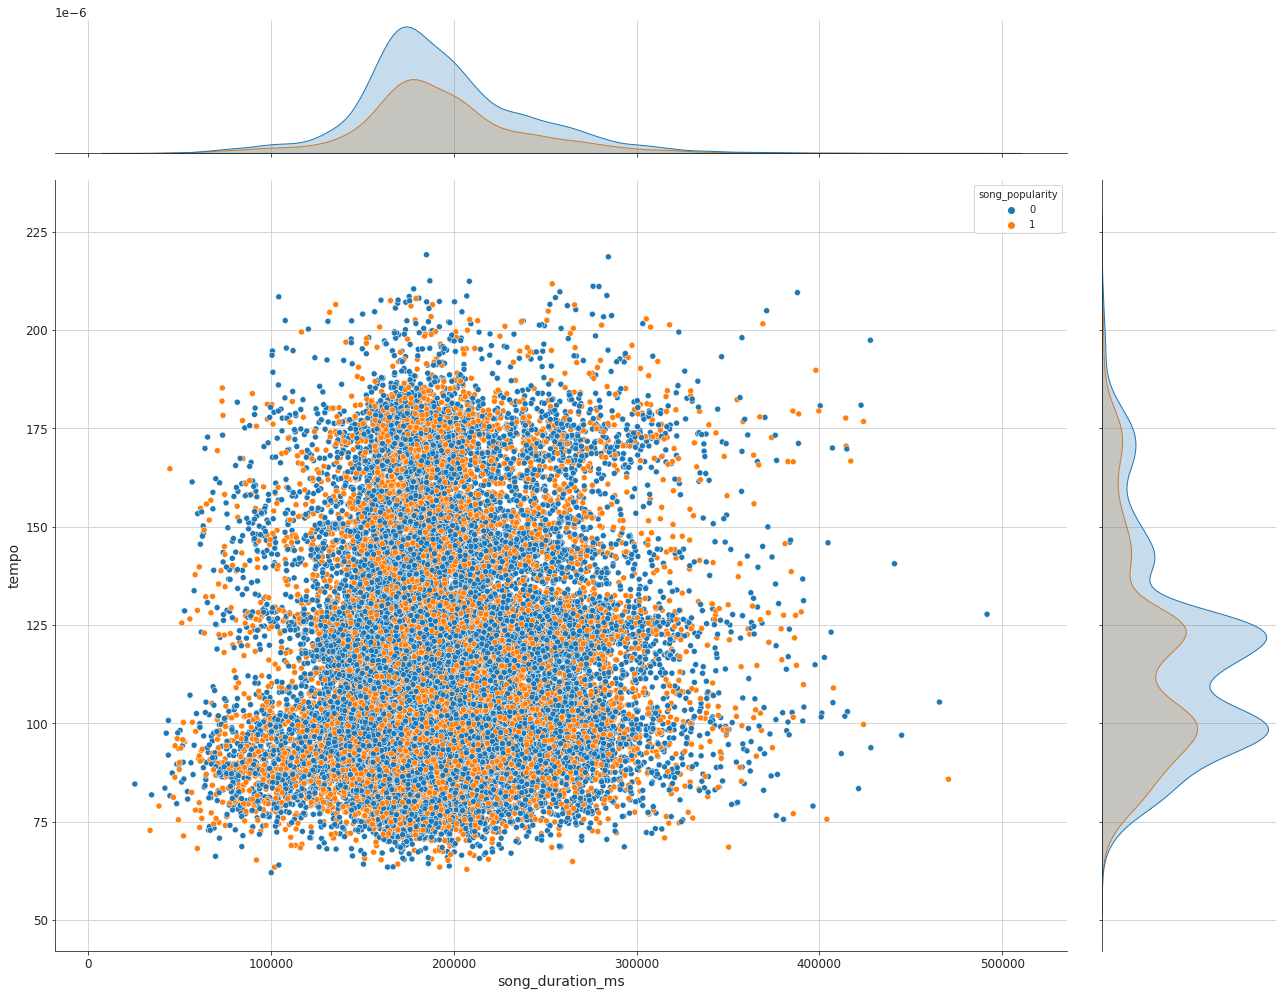

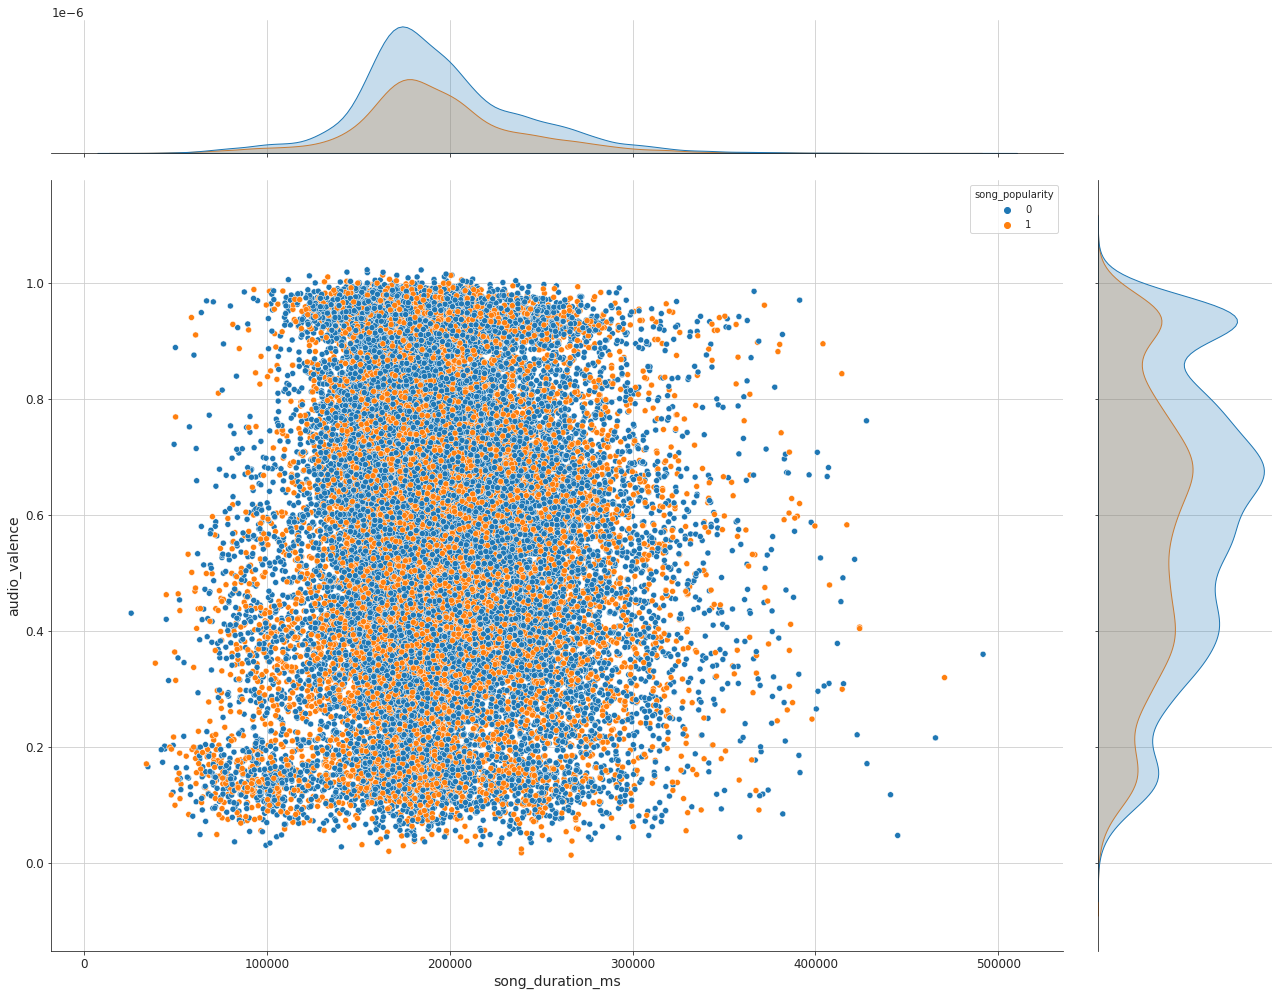

In [26]:
for i in cont_cols:
  sns.jointplot(data=song, y=i, x='song_duration_ms', hue='song_popularity')
  plt.gcf().set_size_inches(20,15)


Maybe instrumentalness should be tansformed into discrete variables? Or categorical variable?

### Discrete variables

<AxesSubplot:xlabel='time_signature', ylabel='count'>

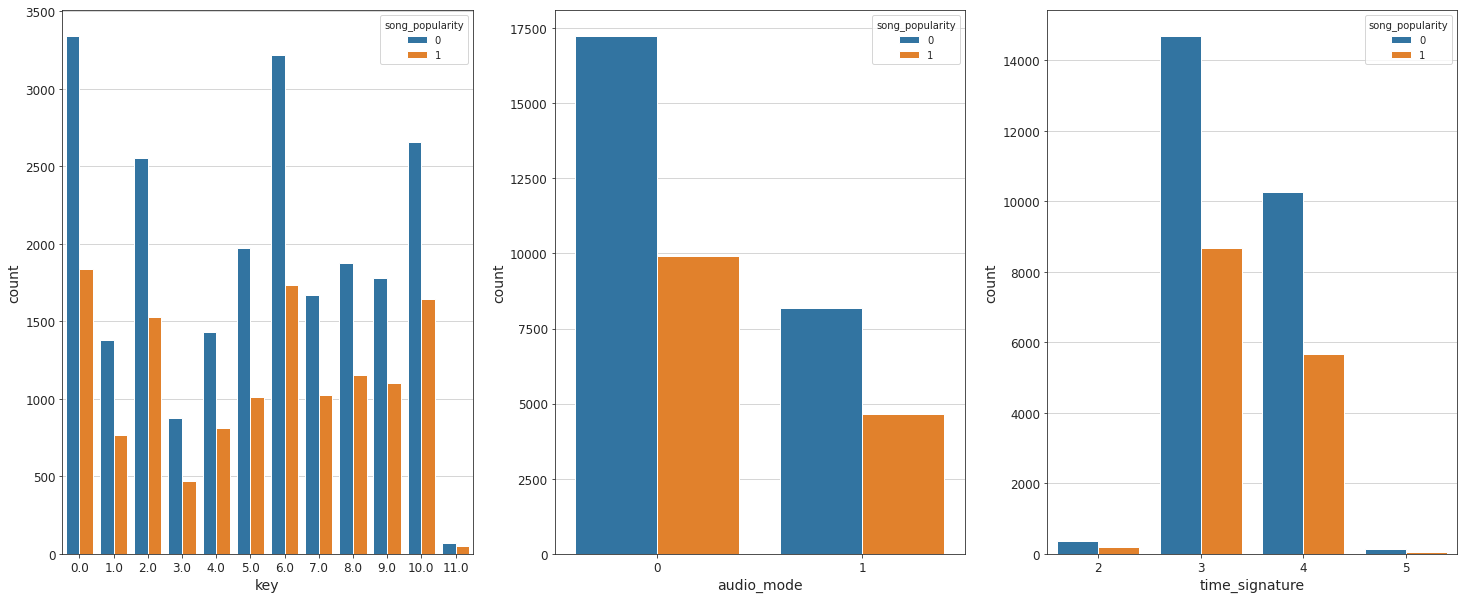

In [27]:
fig, ax = plt.subplots(1,3, figsize=(25, 10))
sns.countplot(data=song, x='key', hue='song_popularity', ax=ax[0])
sns.countplot(data=song, x='audio_mode', hue='song_popularity', ax=ax[1])
sns.countplot(data=song, x='time_signature', hue='song_popularity', ax=ax[2])

!add percentages to the plot

## On the hunt for outliers

In [28]:
boxes = num_categorical

In [29]:
num_categorical

['audio_mode', 'time_signature', 'key']

In [30]:
boxes.append('instrumentalness')

In [31]:
boxes.append('song_popularity')

In [32]:
boxes


['audio_mode', 'time_signature', 'key', 'instrumentalness', 'song_popularity']

In [33]:
boxes = pd.melt(song, value_vars=boxes)

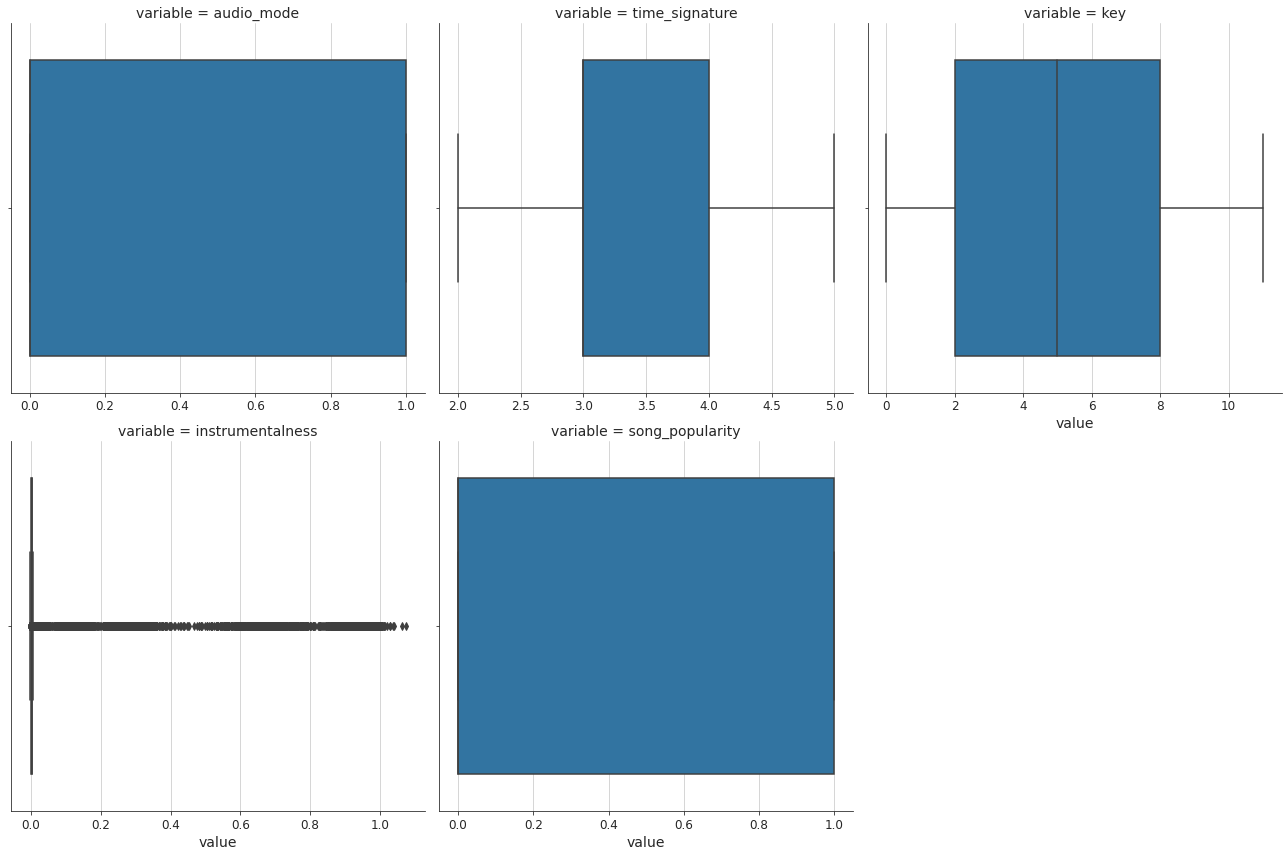

In [34]:
p = sns.FacetGrid(boxes, col='variable', sharex=False, sharey=False, col_wrap=3, size=6)
p = p.map(sns.boxplot, 'value')

## Feature engineering

Resources: 
* [Python | Box-Cox Transformation](https://www.geeksforgeeks.org/box-cox-transformation-using-python/)

* [Song Popularity EDA - Heads or Tails Python Ver](https://www.kaggle.com/dextermojo/song-popularity-eda-heads-or-tails-python-ver) - with implementation of various transformations on contionus variables

* [3 methods to treat outliers in machine learning](https://www.neuraldesigner.com/blog/3_methods_to_deal_with_outliers)


yeo-johnson? 

### Missing values

#### Imports, creating objects, list of columns

In [35]:
from sklearn.impute import SimpleImputer

In [36]:
imputer_median = SimpleImputer(strategy='median')

In [37]:
imputer_mode = SimpleImputer(strategy='most_frequent')

In [38]:
impute_median = song[['song_duration_ms',	'acousticness',	'danceability',	'energy',	'liveness',	'loudness']]

In [39]:
impute_mode = song[['key', 'instrumentalness']]

#### For test transformations

In [40]:
impute_median_test = song_test[['song_duration_ms',	'acousticness',	'danceability',	'energy',	'liveness',	'loudness']]

In [41]:
impute_mode_test = song_test[['key', 'instrumentalness']]

In [42]:
impute_median_list = ['song_duration_ms',	'acousticness',	'danceability',	'energy',	'liveness',	'loudness']

In [43]:
impute_mode_list = ['key', 'instrumentalness']

#### Median fitting, transforming

In [44]:
imputer_median.fit(impute_median)

SimpleImputer(strategy='median')

In [45]:
imputer_median.statistics_

array([ 1.86660000e+05,  1.40532349e-01,  6.08233836e-01,  7.04453318e-01,
        1.35945183e-01, -6.34541262e+00])

In [46]:
np.median(song['song_duration_ms'].dropna())

186660.0

Seems good, we can proceed. 

In [47]:
median_transformed = imputer_median.transform(impute_median)

In [48]:
median_transformed = pd.DataFrame(median_transformed, columns=impute_median.columns,
                                  index=impute_median.index)

In [49]:
median_transformed.isnull().sum()

song_duration_ms    0
acousticness        0
danceability        0
energy              0
liveness            0
loudness            0
dtype: int64

#### Test median transfromation

In [50]:
median_transformed_test = imputer_median.transform(impute_median_test)

In [51]:
median_transformed_test = pd.DataFrame(median_transformed_test, columns=impute_median_test.columns,
                                  index=impute_median_test.index)

In [52]:
median_transformed_test.isnull().sum()

song_duration_ms    0
acousticness        0
danceability        0
energy              0
liveness            0
loudness            0
dtype: int64

#### Mode fitting, trasnforming

In [53]:
imputer_mode.fit(impute_mode)

SimpleImputer(strategy='most_frequent')

In [54]:
imputer_mode.statistics_

array([ 0.        , -0.00021004])

In [55]:
transformed_mode = imputer_mode.transform(impute_mode)

In [56]:
transformed_mode = pd.DataFrame(transformed_mode, columns=impute_mode.columns,
                                index=impute_mode.index)

In [57]:
#Checking for null values
transformed_mode.isnull().sum()

key                 0
instrumentalness    0
dtype: int64

Seems good. One last step is to concat new imputed columns to the old dataset. 

#### Test mode transformation

In [58]:
transformed_mode_test = imputer_mode.transform(impute_mode_test)

In [59]:
transformed_mode_test = pd.DataFrame(transformed_mode_test, columns=impute_mode_test.columns,
                                index=impute_mode_test.index)

In [60]:
#Checking for null values
transformed_mode_test.isnull().sum()

key                 0
instrumentalness    0
dtype: int64

#### Replacing old columns with the imputed ones

In [61]:
X = song.copy()

In [62]:
X = X.drop(impute_median.columns, axis=1)

In [63]:
X = X.drop(impute_mode.columns, axis=1)

In [64]:
X = pd.concat([X, transformed_mode, median_transformed], axis=1)

In [65]:
X.isnull().sum()

id                  0
audio_mode          0
speechiness         0
tempo               0
time_signature      0
audio_valence       0
song_popularity     0
key                 0
instrumentalness    0
song_duration_ms    0
acousticness        0
danceability        0
energy              0
liveness            0
loudness            0
dtype: int64

Ready for to be plugged into a model. (only missing values imputed).

#### Test replacing old columns with the new imputed ones

In [66]:
X_test = song_test.copy()

In [67]:
X_test = X_test.drop(impute_median_test.columns, axis=1)

In [68]:
X_test = X_test.drop(impute_mode_test.columns, axis=1)

In [69]:
X_test = pd.concat([X_test, transformed_mode_test, median_transformed_test], axis=1)

In [70]:
X_test.isnull().sum()

id                  0
audio_mode          0
speechiness         0
tempo               0
time_signature      0
audio_valence       0
key                 0
instrumentalness    0
song_duration_ms    0
acousticness        0
danceability        0
energy              0
liveness            0
loudness            0
dtype: int64

#### Pipeline
not working - dont' know why

In [71]:
from sklearn.compose import ColumnTransformer

In [72]:
pipeline = ColumnTransformer([
                              ('mode', SimpleImputer(strategy='most_frequent'), impute_mode_list),
                              ('median', SimpleImputer(strategy='median'), impute_median_list),
])


In [73]:
pipeline.fit(song)

ColumnTransformer(transformers=[('mode',
                                 SimpleImputer(strategy='most_frequent'),
                                 ['key', 'instrumentalness']),
                                ('median', SimpleImputer(strategy='median'),
                                 ['song_duration_ms', 'acousticness',
                                  'danceability', 'energy', 'liveness',
                                  'loudness'])])

### Feature manipulations

1. Transforming instrumentalness into discrete var upon clusters. 
2. Dealing with outliers
2. Balance target variables.
3. Scaling. 
4. Feature transformations using logs, box-cox, yeo-johnson, recipricoal transformations - [tests](https://www.kaggle.com/dextermojo/song-popularity-eda-heads-or-tails-python-ver)
  * [Types Of Transformations For Better Normal Distribution](https://towardsdatascience.com/types-of-transformations-for-better-normal-distribution-61c22668d3b9)

In [74]:
#song.

## Trainning model and testing

### X,y split

In [75]:
y = X['song_popularity']
X = X.drop('song_popularity', axis=1)


In [76]:
#Some data sample creation
some_data = X.iloc[:5]
some_labels = y.iloc[:5]

### Logistic Regression

In [77]:
from sklearn.linear_model import LogisticRegression

In [78]:
log_reg = LogisticRegression(random_state=0)

In [79]:
log_reg.fit(X,y)

LogisticRegression(random_state=0)

In [80]:
#Precting on random some data from training set
print('Predictions on some data: ', log_reg.predict(some_data))

Predictions on some data:  [0 0 0 0 0]


In [81]:
#Comparing with labels
print('Original labels: ', list(some_labels))

Original labels:  [0, 1, 0, 0, 0]


#### Evaluations with AUC on training data

In [82]:
song_predictions = log_reg.predict(X)

In [83]:
print('AUC scores on the training set: ', cross_val_score(log_reg, X,y, cv=10, scoring='roc_auc'),
      'Mean of AUC scores: ', np.mean(cross_val_score(log_reg, X,y, cv=10, scoring='roc_auc')))

AUC scores on the training set:  [0.51423869 0.48427473 0.4961957  0.50184837 0.50114537 0.49088185
 0.49910475 0.50410416 0.49753766 0.5036676 ] Mean of AUC scores:  0.4992998898311473


### Naive Bayes

In [84]:
from sklearn.naive_bayes import GaussianNB

In [85]:
nai_bay = GaussianNB()

In [86]:
nai_bay.fit(X,y)

GaussianNB()

In [87]:
#Precting on random some data from training set
print('Predictions on some data: ', nai_bay.predict(some_data))

Predictions on some data:  [0 0 0 0 0]


In [88]:
#Comparing with labels
print('Original labels: ', list(some_labels))

Original labels:  [0, 1, 0, 0, 0]


#### Evaluations with AUC 

In [89]:
song_predict_nb = nai_bay.predict(X)

In [90]:
print('AUC scores on the training set: ', cross_val_score(nai_bay, X,y, cv=10, scoring='roc_auc'),
      'Mean of AUC scores: ', np.mean(cross_val_score(nai_bay, X,y, cv=10, scoring='roc_auc')))

AUC scores on the training set:  [0.53676409 0.52272067 0.54761547 0.54746973 0.52182268 0.52516974
 0.52272224 0.5216392  0.5251495  0.55474206] Mean of AUC scores:  0.5325815384771596


### KNN

In [91]:
from sklearn.neighbors import KNeighborsClassifier

In [92]:
knn = KNeighborsClassifier(n_neighbors=5)

In [93]:
knn.fit(X,y)

KNeighborsClassifier()

In [94]:
#Precting on random some data from training set
print('Predictions on some data: ', knn.predict(some_data))

Predictions on some data:  [0 0 0 0 0]


In [95]:
#Comparing with labels
print('Original labels: ', list(some_labels))

Original labels:  [0, 1, 0, 0, 0]


#### KNN evaluations with AUC

In [96]:
song_predict_nb = knn.predict(X)

In [97]:
print('AUC scores on the training set: ', cross_val_score(knn, X,y, cv=10, scoring='roc_auc'),
      'Mean of AUC scores: ', np.mean(cross_val_score(knn, X,y, cv=10, scoring='roc_auc')))

AUC scores on the training set:  [0.518596   0.49065193 0.49034587 0.505535   0.50364453 0.4993032
 0.49206432 0.49355316 0.4977921  0.51514704] Mean of AUC scores:  0.5006633162257964


### SVM

In [98]:
from sklearn import svm

In [99]:
svm_clf = svm.SVC()

In [100]:
#svm_clf.fit(X,y)

In [101]:
#Precting on random some data from training set
#print('Predictions on some data: ', svm_clf.predict(some_data))

In [102]:
#Comparing with labels
print('Original labels: ', list(some_labels))

Original labels:  [0, 1, 0, 0, 0]


#### SVM evaluations with AUC

In [103]:
#song_predict_nb = svm_clf.predict(X)

In [104]:
#print('AUC scores on the training set: ', cross_val_score(svm_clf, X,y, cv=10, scoring='roc_auc'),
#     'Mean of AUC scores: ', np.mean(cross_val_score(svm_clf, X,y, cv=10, scoring='roc_auc')))

### DecisionTree

In [105]:
from sklearn.tree import DecisionTreeClassifier

In [106]:
dtree = DecisionTreeClassifier(max_depth=10, random_state=0, max_features=None, min_samples_leaf=15)

In [107]:
dtree.fit(X,y)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=15, random_state=0)

In [108]:
#Precting on random some data from training set
print('Predictions on some data: ', dtree.predict(some_data))

Predictions on some data:  [1 0 0 0 0]


In [109]:
#Comparing with labels
print('Original labels: ', list(some_labels))

Original labels:  [0, 1, 0, 0, 0]


#### DecisionTree evaluaations with AUC

In [110]:
song_predict_nb = dtree.predict(X)

In [111]:
print('AUC scores on the training set: ', cross_val_score(dtree, X,y, cv=10, scoring='roc_auc'),
      'Mean of AUC scores: ', np.mean(cross_val_score(dtree, X,y, cv=10, scoring='roc_auc')))

AUC scores on the training set:  [0.5        0.53806215 0.52510141 0.53272066 0.51418231 0.5394647
 0.54597427 0.54160016 0.53013151 0.544963  ] Mean of AUC scores:  0.5312200176776306


### RandomForest

In [112]:
from sklearn.ensemble import RandomForestClassifier

In [113]:
rfm = RandomForestClassifier(n_estimators=70, oob_score=True, n_jobs=-1, random_state=0, max_features=None, min_samples_leaf= 30)

In [114]:
rfm.fit(X,y)

RandomForestClassifier(max_features=None, min_samples_leaf=30, n_estimators=70,
                       n_jobs=-1, oob_score=True, random_state=0)

In [115]:
#Precting on random some data from training set
print('Predictions on some data: ', rfm.predict(some_data))

Predictions on some data:  [0 0 0 0 0]


In [116]:
#Comparing with labels
print('Original labels: ', list(some_labels))

Original labels:  [0, 1, 0, 0, 0]


#### RandomForest evaluation with AUC

In [117]:
song_predict_rfm = rfm.predict(X)

In [118]:
print('AUC scores on the training set: ', cross_val_score(rfm, X,y, cv=5, scoring='roc_auc'),
      'Mean of AUC scores: ', np.mean(cross_val_score(rfm, X,y, cv=5, scoring='roc_auc')))

AUC scores on the training set:  [0.55781181 0.56217584 0.56709537 0.56149662 0.55664507] Mean of AUC scores:  0.5610449411374293


## Generating submission

The best scores for now is with RandomForest ~.56

2nd best scores are from ~.53 with:
* DecisionTree
* Naive Bayes

In [119]:
test_song_rfm_preds = rfm.predict(X_test)

In [120]:
print('AUC scores on the test set: ', cross_val_score(rfm, X_test,test_song_rfm_preds, cv=5, scoring='roc_auc'),
      'Mean of AUC scores: ', np.mean(cross_val_score(rfm, X_test,test_song_rfm_preds, cv=5, scoring='roc_auc')))

AUC scores on the test set:  [0.88168895 0.90145776 0.9181557  0.95818196 0.91134892] Mean of AUC scores:  0.9141666587272275


Yyyy. Ok. Something definetly went wrong :D 

Submitting regardless. We'll see what'll happen. 

In [121]:
sample_submission = pd.read_csv('../input/song-popularity-prediction/sample_submission.csv')

In [122]:
sample_submission

id  song_popularity
0        0                0
1        1                0
2        2                0
3        3                0
4        4                0
...    ...              ...
9995  9995                0
9996  9996                0
9997  9997                0
9998  9998                0
9999  9999                0

[10000 rows x 2 columns]

In [123]:
output = pd.DataFrame({'id': sample_submission.index,
                       'song_popularity': test_song_rfm_preds})

In [124]:
output.to_csv('submission.csv', index=False)